## Oppgave 3, teoridel:

In [5]:
import numpy as np
import matplotlib.pyplot as plt

C:\Users\adolf\AppData\Local\Temp\ipykernel_2520\3391014069.py:36: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  ax.legend([contour.collections[0] for contour in contours], [f'θ = {theta}' for theta in θ_values])


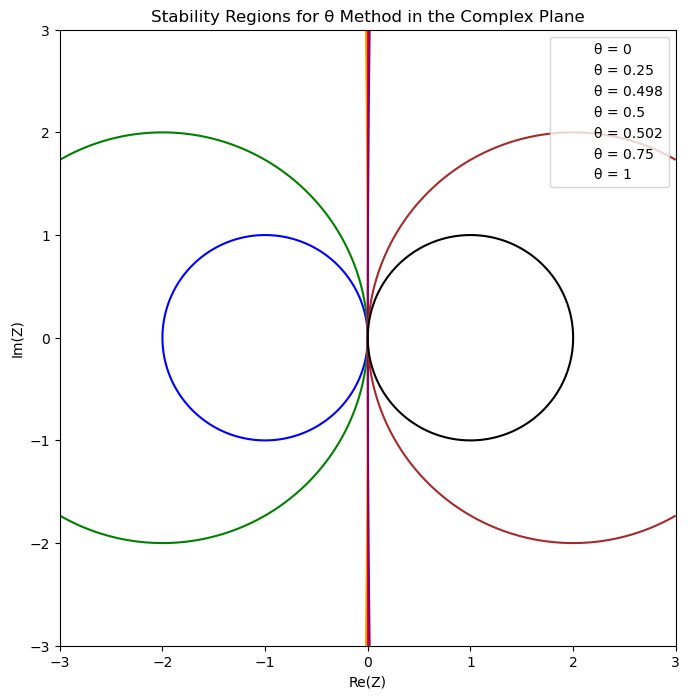

In [6]:
# Define the stability function R for the θ method
def stability_function(Z, θ):
    return (1 + (1 - θ) * Z) / (1 - θ * Z)

x = np.linspace(-3, 3, 400)
y = np.linspace(-3, 3, 400)
X, Y = np.meshgrid(x, y)
Z = X + 1j * Y

fig, ax = plt.subplots(figsize=(8, 8))

# Define the colors for each θ value explicitly
θ_values = [0, 0.25, 0.498, 0.5, 0.502, 0.75, 1]
colors = ['blue', 'green', 'orange', 'red', 'purple', 'brown', 'black']

contours = []

# Plot the stability regions for different θ values
for i, θ in enumerate(θ_values):
    R = stability_function(Z, θ)
    magnitude = np.abs(R)

    # Plot points where the magnitude of R is <= 1 (stable region)
    contour = ax.contour(X, Y, magnitude, levels=[1], colors=[colors[i]])
    contours.append(contour)

# Add labels and title
ax.set_xlabel('Re(Z)')
ax.set_ylabel('Im(Z)')
ax.set_title('Stability Regions for θ Method in the Complex Plane')

# Create a legend manually based on the contours
ax.legend([contour.collections[0] for contour in contours], [f'θ = {theta}' for theta in θ_values])

# Set equal aspect ratio to ensure circles are circular
ax.set_aspect('equal')

# Show the plot
plt.show()


## Oppgave 3, numerikkdel:

In [26]:
# Parameters
κ = 0.01
Nx, Ny = 64, 64
x = np.linspace(0, 1, Nx)
y = np.linspace(0, 1, Ny)
X, Y = np.meshgrid(x, y, indexing='ij')
t_0, T = 0, 1
λ = 0.1
Nt = 100
θ = 0.5
U_0 = f(X, Y, t, λ, κ)

In [27]:
def f(x, y, t, λ, κ):
    # Function as defined in 3.2
    return np.sin(x)*np.cos(y)*np.exp(-λ*κ*t)

In [28]:
def discreteFourier(U):
    # Returns the two dimentional discrete Fourier transform of U
    return np.fft.fft2(U)

def inverseDiscreteFourier(U_hat):
    # Inverse Fourier transform
    return np.fft.ifft2(U_hat).real

def transient_biharmonic_solver(*, κ, X, Y, U_0, t_0, T, Nt, θ, g = None):
    """
    Solves the transient biharmonic equation using the theta method.

    Parameters:
    ----------- 
    κ (float): Diffusion coefficient.
    X (ndarray): 2D array of x-coordinates.
    Y (ndarray): 2D array of y-coordinates.
    U_0 (ndarray): Initial condition array.
    t_0 (float): Initial time.
    T (float): Final time.
    Nt (int): Number of time steps.
    g (callable, optional): Source term function g(X, Y, t). Defaults to None.

    Yields:
    -------
    tuple: A tuple containing the discrete Fourier transform of U at t, and the current time t.
    """
    
    
    # Grid resolution
    Nx, Ny = X.shape

    # Wavenumbers for spectral differentiation
    kx = np.fft.fftfreq(Nx, d=(X[1,0] - X[0,0])) * 2 * np.pi
    ky = np.fft.fftfreq(Ny, d=(Y[0,1] - Y[0,0])) * 2 * np.pi
    KX, KY = np.meshgrid(kx, ky, indexing='ij')
    
    # Compute Laplacian squared in Fourier space (∇⁴ operator)
    L = -(KX**2 + KY**2)  # Laplacian in Fourier space
    L2 = L**2  # Biharmonic operator in Fourier space
    
    U_hat = discreteFourier(U_0)
    
    t = t_0 
    dt = (T-t_0)/Nt
    
    # For convenience when plotting, computing errors, etc., 
    # return the initial solution and initial time.
    yield U_hat, t    
    
    while t < T-dt/2:
        # Solves for next time step and update time
        t_new = t + dt
        
        if g is not None:
            g_hat = discreteFourier(g(X, Y, t_new))
        else:
            g_hat = np.zeros_like(U_hat)
        
        # Solves the equations in Fourier space
        A = 1 - θ * dt * κ * L2
        B = 1 + (1 - θ) * dt * κ * L2
        
        U_hat_new = (B * U_hat + dt * g_hat) / A

        U_hat = U_hat_new # Updates U_hat
        t = t_new
        
        yield U_hat, t
        
solver = transient_biharmonic_solver(κ=κ, X=X, Y=Y, U_0=U_0, t_0=t_0, T=T, Nt=Nt, θ = 0.5, g = None)

for U_hat, t in solver:
    U, t = inverseDiscreteFourier(U_hat), t
    print(f"Time: {t}, U: {U.shape}")

Time: 0, U: (64, 64)
Time: 0.01, U: (64, 64)
Time: 0.02, U: (64, 64)
Time: 0.03, U: (64, 64)
Time: 0.04, U: (64, 64)
Time: 0.05, U: (64, 64)
Time: 0.060000000000000005, U: (64, 64)
Time: 0.07, U: (64, 64)
Time: 0.08, U: (64, 64)
Time: 0.09, U: (64, 64)
Time: 0.09999999999999999, U: (64, 64)
Time: 0.10999999999999999, U: (64, 64)
Time: 0.11999999999999998, U: (64, 64)
Time: 0.12999999999999998, U: (64, 64)
Time: 0.13999999999999999, U: (64, 64)
Time: 0.15, U: (64, 64)
Time: 0.16, U: (64, 64)
Time: 0.17, U: (64, 64)
Time: 0.18000000000000002, U: (64, 64)
Time: 0.19000000000000003, U: (64, 64)
Time: 0.20000000000000004, U: (64, 64)
Time: 0.21000000000000005, U: (64, 64)
Time: 0.22000000000000006, U: (64, 64)
Time: 0.23000000000000007, U: (64, 64)
Time: 0.24000000000000007, U: (64, 64)
Time: 0.25000000000000006, U: (64, 64)
Time: 0.26000000000000006, U: (64, 64)
Time: 0.2700000000000001, U: (64, 64)
Time: 0.2800000000000001, U: (64, 64)
Time: 0.2900000000000001, U: (64, 64)
Time: 0.3000000